# Lesson 3 Assignment - Wine Classifier

## Author - Trupti Gandhi

### Instructions
Your task for this assignment:  Design a simple, low-cost sensor that can distinguish between red wine and white wine.
Your sensor must correctly distinguish between red and white wine for at least 95% of the samples in a set of 6497 test samples of red and white wine.

Your technology is capable of sensing the following wine attributes:
- Fixed acidity  -  Free sulphur dioxide
- Volatile acidity  -  Total sulphur dioxide
- Citric acid  -  Sulphates
- Residual sugar  -  pH
- Chlorides  - Alcohol
- Density




## Tasks
1. Read <a href="https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/WineQuality.pdf">WineQuality.pdf</a>.
2. Use the RedWhiteWine.csv or RedWhiteWine.arff that is provided.
Note: If needed, remove the quality attribute, which you will not need for this assignment.
3. Build an experiment using Naive Bayes Classifier.

Answer the following questions:
1. What is the percentage of correct classification results (using all attributes)?
2. What is the percentage of correct classification results (using a subset of the attributes)?
3. What is the AUC of your model?
4. What is the best AUC that you can achieve?
5. Which are the the minimum number of attributes? Why?


In [123]:
URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/RedWhiteWine.csv"

In [124]:
#Step 1 - Import libraries and modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns


Steps:
- Data Acquisition
- Feature Selection 
- Divide Dataset
- Implement Model
- Optimize Model
- Model Validation 
- prediction



#### Understanding Wine and Types
Wine is an alcoholic beverage made from grapes which is fermented without the addition of sugars, acids, enzymes, water, or other nutrients.

Red wine is made from dark red and black grapes. The color usually ranges from various shades of red, brown and violet. This is produced with whole grapes including the skin which adds to the color and flavor of red wines, giving it a rich flavor.

White wine is made from white grapes with no skins or seeds. The color is usually straw-yellow, yellow-green, or yellow-gold. Most white wines have a light and fruity flavor as compared to richer red wines.

### Step 1: Data Acquisition

In [125]:
#Step 2 - Load red wine data
df_Red_White = pd.read_csv(URL)
df_Red_White.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


**"Features"**
Also known as predictors, inputs, or attributes


**"Response" **
Also known as the target, label, or output


**"Observations" **
Also known as samples, instances, or records

In [126]:
# Check the shape of dataset
df_Red_White.shape

(6497, 13)

There are 6497 wine samples (red:1599, white:4898) in the dataset with 12 features describing chemical properties (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and quality). 

In [127]:
# Check the columns of dataset
df_Red_White.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'Class']

### Understanding Wine Attributes and Properties
- **fixed acidity**: Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine. Reducing acids significantly might lead to wines tasting flat. Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic). This variable is usually expressed in  in the dataset.
-  **volatile acidity**: These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavor. In the US, the legal limits of volatile acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine. The volatile acidity is expressed in  in the dataset.
- **citric acid**: This is one of the fixed acids which gives a wine its freshness. Usually most of it is consumed during the fermentation process and sometimes it is added separately to give the wine more freshness. It's usually expressed in  in the dataset.
- **residual sugar**: This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped. It's usually expressed in  in the dataset.
- chlorides: This is usually a major contributor to saltiness in wine. It's usually expressed in  in the dataset.
- **free sulfur dioxide**: This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulphur to bind. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. This variable is expressed in  in the dataset.
- **total sulfur dioxide**: This is the sum total of the bound and the free sulfur dioxide (). Here, it's expressed in . This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour.
- **density**: This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol.
- **pH**: Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.
- **sulphates**: These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affects the wine aroma and flavor. Here, it's expressed in  in the dataset.
- **alcohol**: Wine is an alcoholic beverage. Alcohol is formed as a result of yeast converting sugar during the fermentation process. The percentage of alcohol can vary from wine to wine. Hence it is not a surprise for this attribute to be a part of this dataset. It's usually measured in % vol or alcohol by volume (ABV).
- **quality**: Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.
- **wine_type**: A wine can either be a 'red' or a 'white' wine.

One of the predictive models we will build in this chapter would be such that we can predict the type of wine by looking at other wine attributes.


In [128]:
df_Red_White.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


There are about 12 different features for each wine in the data-set. The last column, quality, is a metric of how good a specific wine was rated to be, between 1 to 10.

Let’s see if any of these columns have missing information.

In [129]:
df_Red_White.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
Class                   False
dtype: bool

The output shows us that no columns are empty.

In [130]:
df_Red_White.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
Class                   6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


In [131]:
#Classical statistics
df_Red_White.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


Mean residual sugar level is 5.44 g/l, but there is a sample of very sweet wine with 65.8 g/l (an outlier). Mean free sulfur dioxide is 30.5 ppm. Max value is 289 which is quite high as 75% is 41 ppm. PH of wine is within range from 2.7 till 4, mean 3.2. There is no basic wines in this dataset (no high pH levels). Alcohol: lightest wine is 8%, strongest is 14.9. Minimum quality mark is 3, mean 5.8, highest is 9.

In [132]:
#How many duplicate rows are in the dataset ?
sum(df_Red_White.duplicated())

1177

In [133]:
#Drop all duplicate rows
df_Red_White.drop_duplicates(keep=False, inplace=True)

I am not going to remove duplicates in a model file. Including same records in the model, changes predictive power. To make sure that each data point influence counts equally, only one record per data or action being modeled should be included. It never hurts to dedupe your model file before you start building a predictive model.

Double-check your population size. A good goal to shoot for in a modeling dataset is at least 3,000 records.  The larger your population size is, the most robust your model will be.Our dateset has  4000 observations.

In [134]:
df_Red_White.shape

(4328, 13)

### Step 2 : Feature Selection

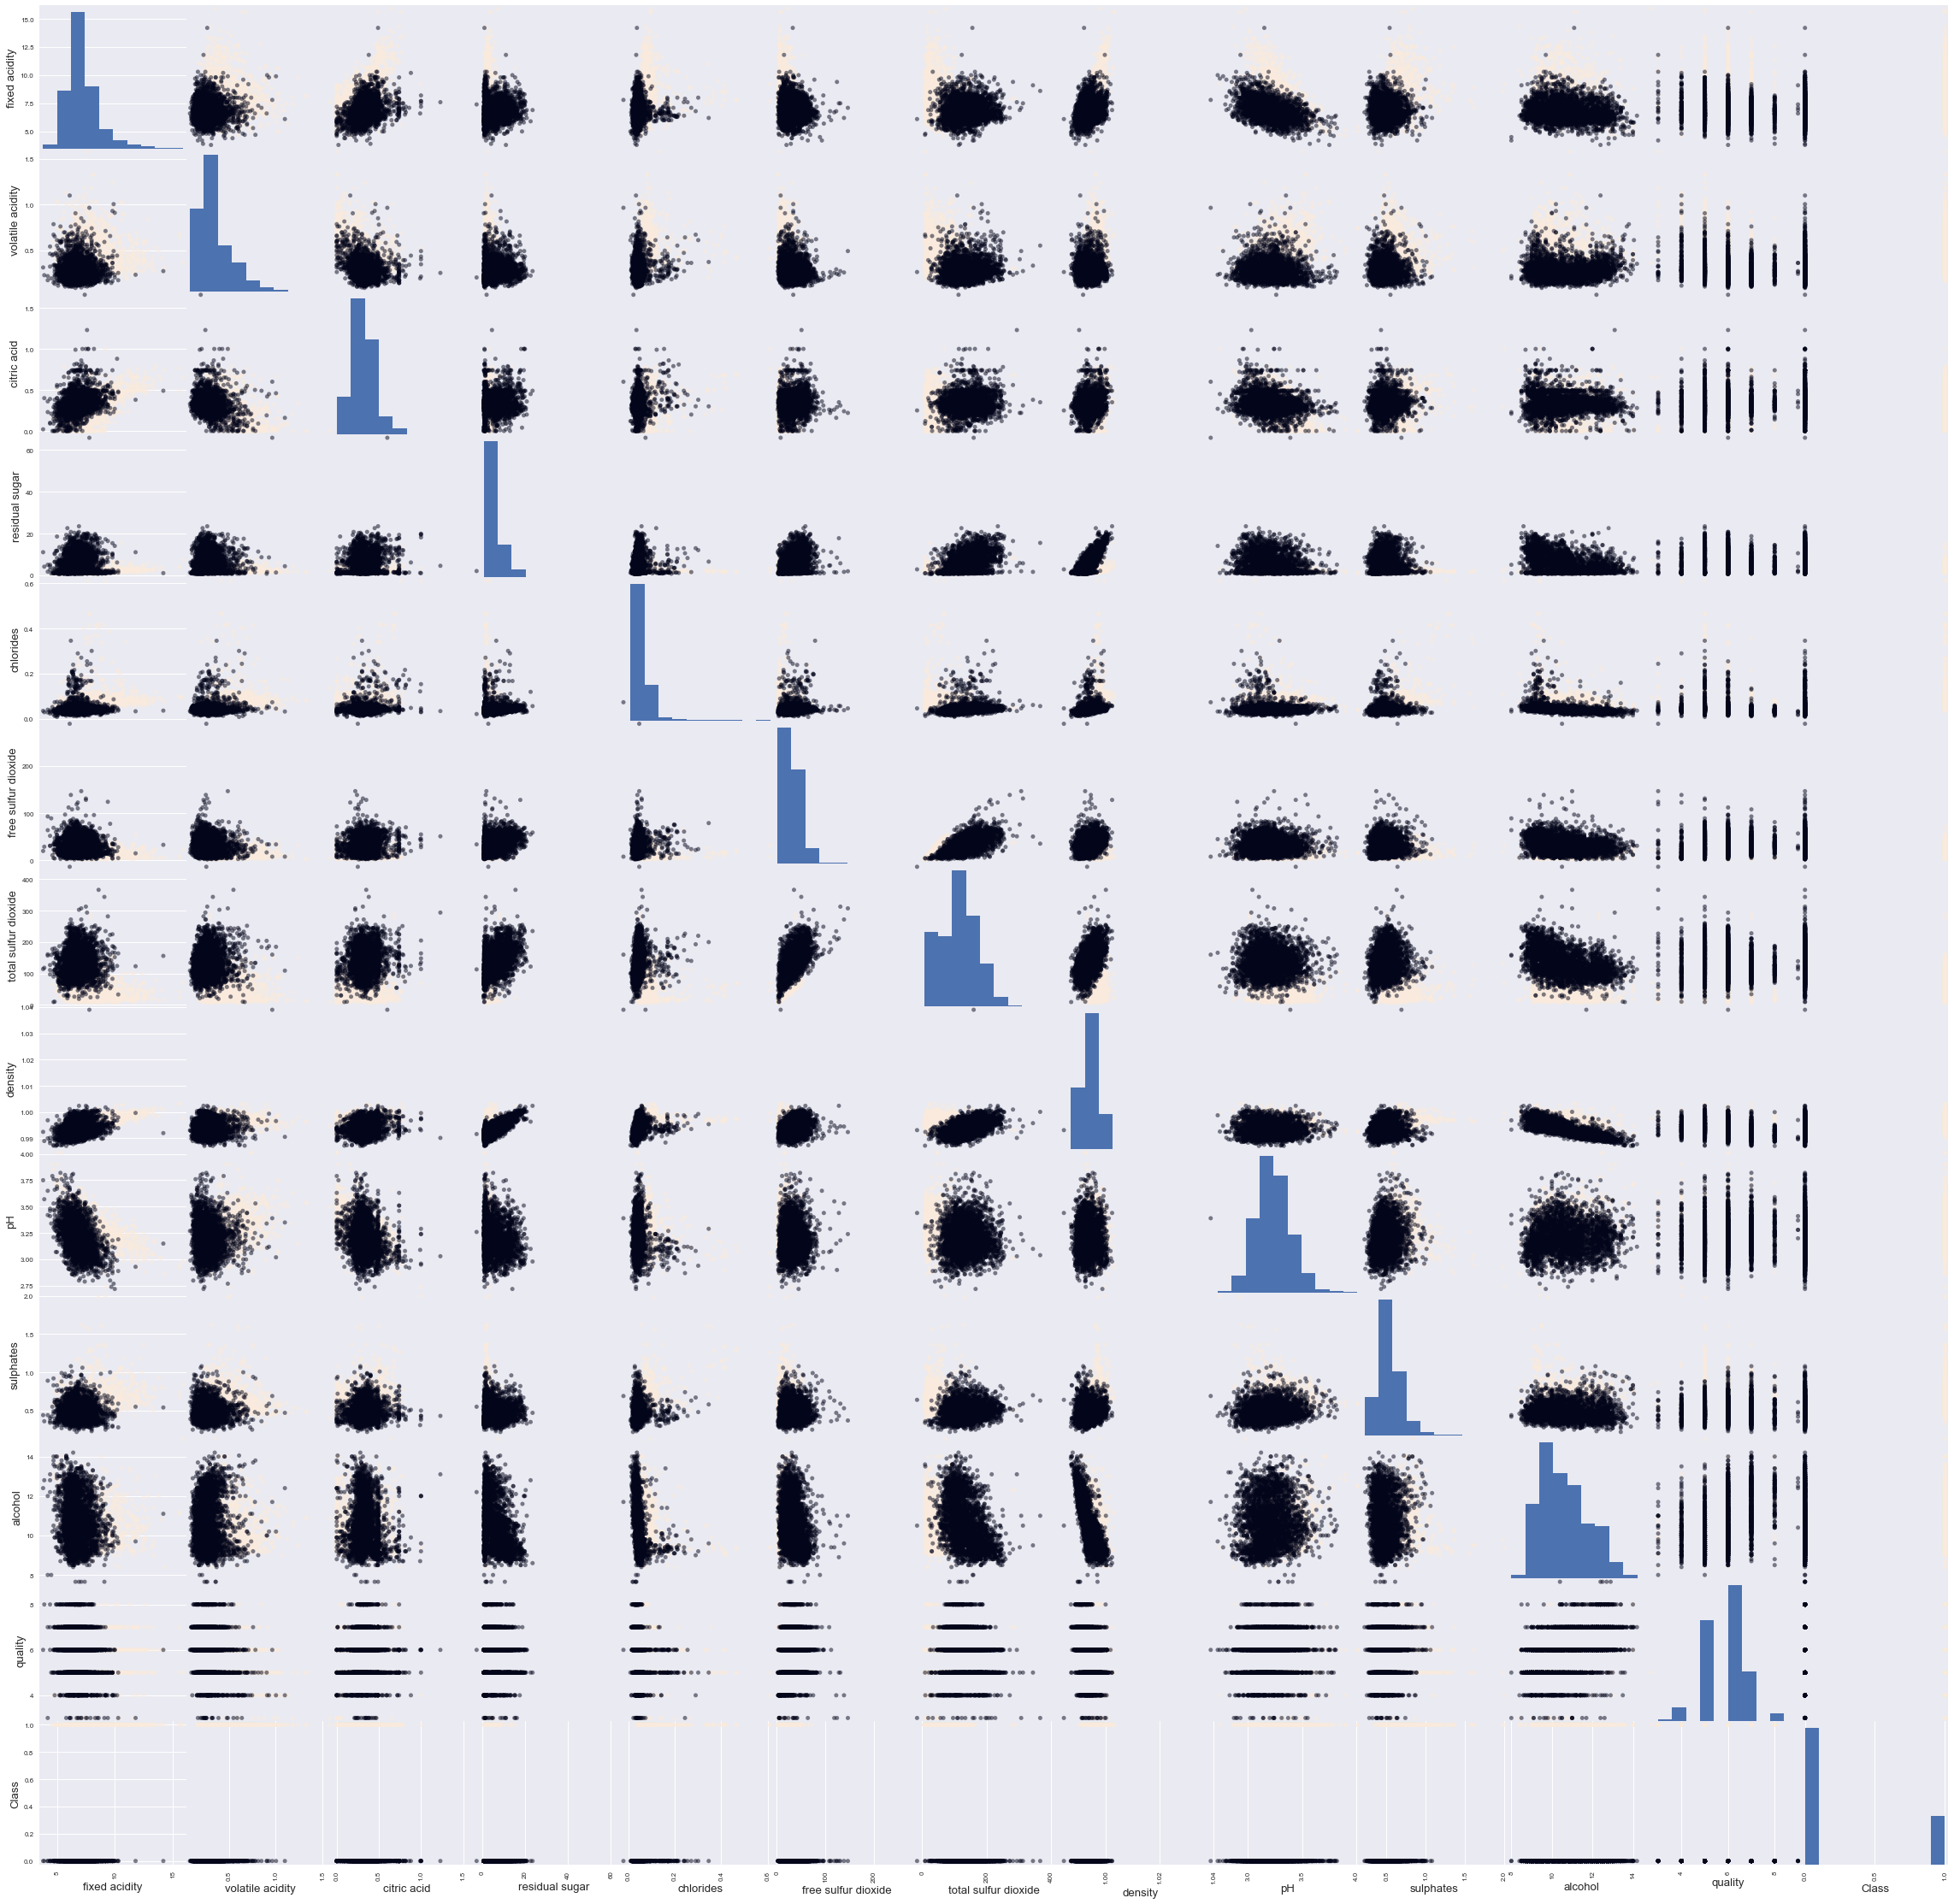

In [135]:
%matplotlib inline
_ = pd.plotting.scatter_matrix(df_Red_White,c=df_Red_White.loc[:,'Class'], figsize=[40,40],s =100)


From the above scatterplot we can get some interesting details. For some of the features, the distribution appears to be fairly linear. For some others, the distribution appears to be negatively skewed. There are indeed some interesting co-dependencies between some of the features.At the same time, we can clearly see the differance between white wine and red wine

#### What is/are the main feature(s) of interest in your dataset?

We want to determine What chemical charateristics are most important in predicting the 'class' of wine. Thus we need to find the main properties of wine that affect the wine 'class'. 

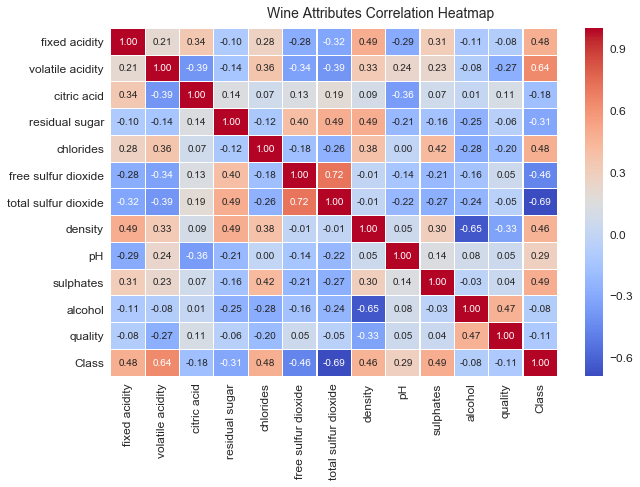

In [136]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df_Red_White.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

I checked correlation between all variables in wine dataset.

From above graph, we can clearly see that class has strong correlation with below features:

- Fixed acidity 
- Free sulphur dioxide
- Volatile acidity 
- Total sulphur dioxide
- Citric acid 
- Sulphates
- Residual sugar 
- pH
- Chlorides 
- Density

In [137]:
df_Red_White.Class.value_counts()

0    3189
1    1139
Name: Class, dtype: int64

In [138]:
df_Red_White['Class'] = df_Red_White.Class.apply(lambda x:"Red" if x == 0 else "White")

In [139]:
df_Red_White['Class'].value_counts()

Red      3189
White    1139
Name: Class, dtype: int64

In [140]:
subset_attributes = ['fixed acidity','free sulfur dioxide','volatile acidity', 'total sulfur dioxide','citric acid',
                     'sulphates','residual sugar','pH','chlorides','density']

desc= (df_Red_White.loc[df_Red_White.Class =='Red',subset_attributes])
rs = round(desc.describe(),2)

desc2= (df_Red_White.loc[df_Red_White.Class =='White',subset_attributes])
ws = round(desc2.describe(),2)

pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                                       \
            fixed acidity free sulfur dioxide volatile acidity   
count             3189.00             3189.00          3189.00   
mean                 6.82               34.52             0.28   
std                  0.89               17.41             0.11   
min                  3.80                2.00             0.08   
25%                  6.20               22.00             0.21   
50%                  6.70               32.00             0.26   
75%                  7.30               45.00             0.33   
max                 14.20              289.00             1.10   

                                                                          \
      total sulfur dioxide citric acid sulphates residual sugar       pH   
count              3189.00     3189.00   3189.00        3189.00  3189.00   
mean                136.42        0.33      0.49           5.51     3.20   
std                  43.94        0.12      0.11           4.66     0.15   
min                   9.00        0.00      0.22           0.70     2.72   
25%                 105.00        0.27      0.41           1.60     3.10   
50%                 131.00        0.32      0.48           4.20     3.19   
75%                 166.00        0.39      0.56           8.20     3.30   
max                 440.00        1.66      1.08          65.80     3.82   

                         White Wine Statistics                      \
      chlorides  density         fixed acidity free sulfur dioxide   
count   3189.00  3189.00               1139.00             1139.00   
mean       0.05     0.99                  8.29               15.93   
std        0.02     0.00                  1.73               10.39   
min        0.01     0.99                  4.60                1.00   
25%        0.04     0.99                  7.10                7.00   
50%        0.04     0.99                  7.90               14.00   
75%        0.05     1.00                  9.20               21.00   
max        0.35     1.04                 15.90               72.00   

                                                                   \
      volatile acidity total sulfur dioxide citric acid sulphates   
count          1139.00              1139.00     1139.00   1139.00   
mean              0.53                47.15        0.27      0.66   
std               0.19                33.99        0.20      0.17   
min               0.16                 6.00        0.00      0.33   
25%               0.39                22.00        0.10      0.55   
50%               0.52                38.00        0.26      0.62   
75%               0.64                63.00        0.43      0.72   
max               1.58               289.00        1.00      2.00   

                                                  
      residual sugar       pH chlorides  density  
count        1139.00  1139.00   1139.00  1139.00  
mean            2.49     3.31      0.09     1.00  
std             1.26     0.16      0.05     0.00  
min             1.20     2.74      0.03     0.99  
25%             1.90     3.21      0.07     1.00  
50%             2.20     3.31      0.08     1.00  
75%             2.60     3.40      0.09     1.00  
max            15.50     4.01      0.61     1.00

- Mean residual sugar level is 6.39g/l for Red Wine and 2.54 g/l for White wine
- Mean free sulfur dioxide is 35.31ppm for Red Wine and 15.87 ppm for White wine
- There is not a big differance in Mean of PH value of red wine and white wine, citric acid, fixed acidity, chlorides and density.
- Volatile acidity is .28 for red wine and 0.53 for white wine.
- Mean of Total sulfer dioxide is 138.3 for red wine and 46.4 for white wine.




First, a histogram is generated to show the distribution of each feature.

First I’d like to have a look at a single variable to get an idea about its distribution and decide for the things I will have a look deeper later

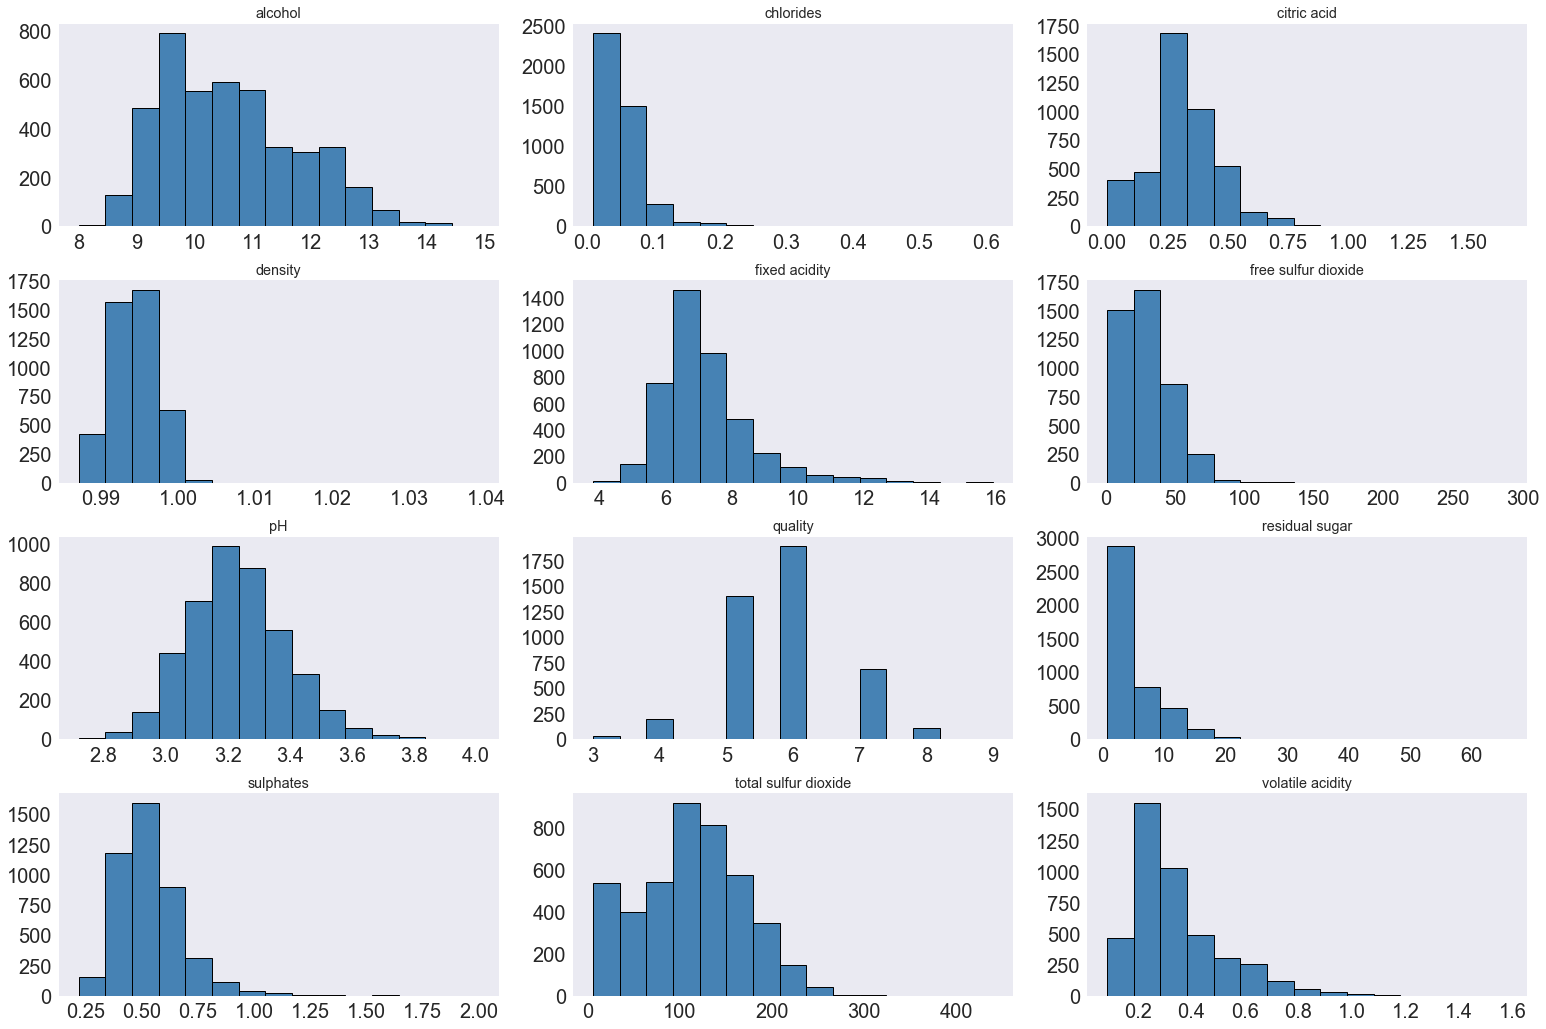

In [141]:

plt.rcParams["figure.figsize"] = (18,12)
df_Red_White.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
              xlabelsize=20, ylabelsize=20, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
#plt.savefig("attribute_histogram_plots")
plt.show()

Checking outliers in each columns except for class

Be sure to account for any outliers and/or missing values. Large rifts in individual variables can add up when you’re combining those variables to build a predictive model. Checking the minimum and maximum values for each variable can be a quick way to spot any records that are out of the usual realm

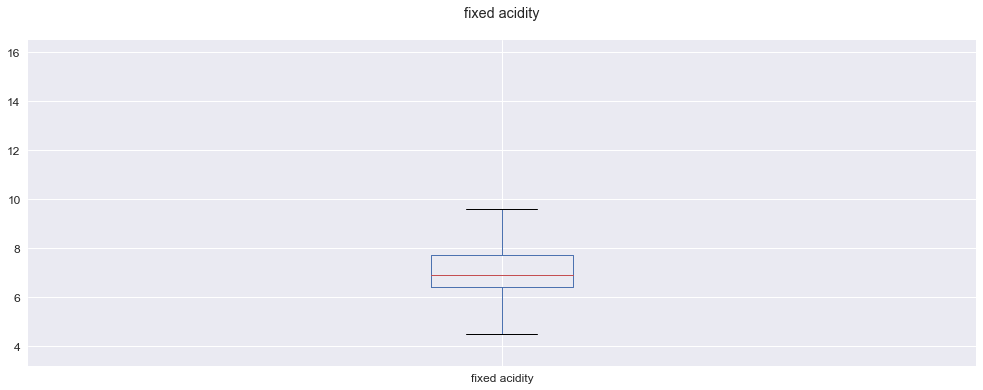

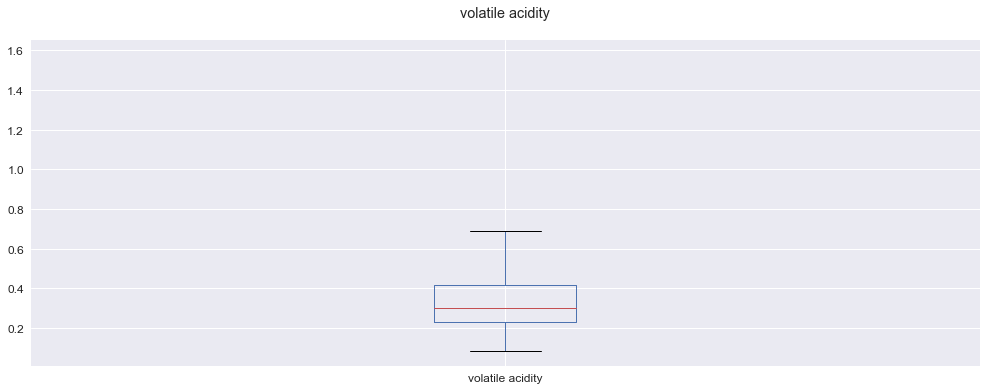

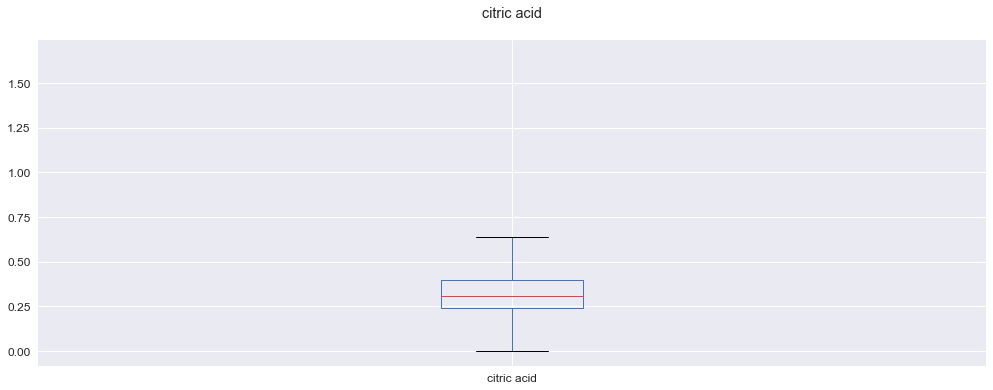

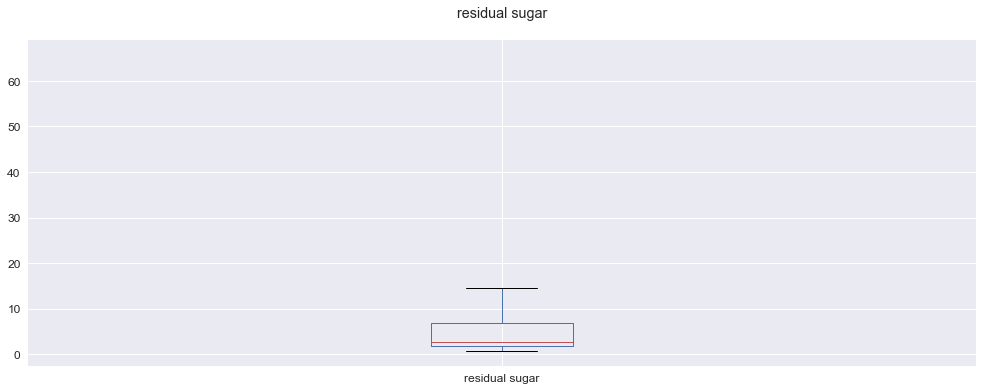

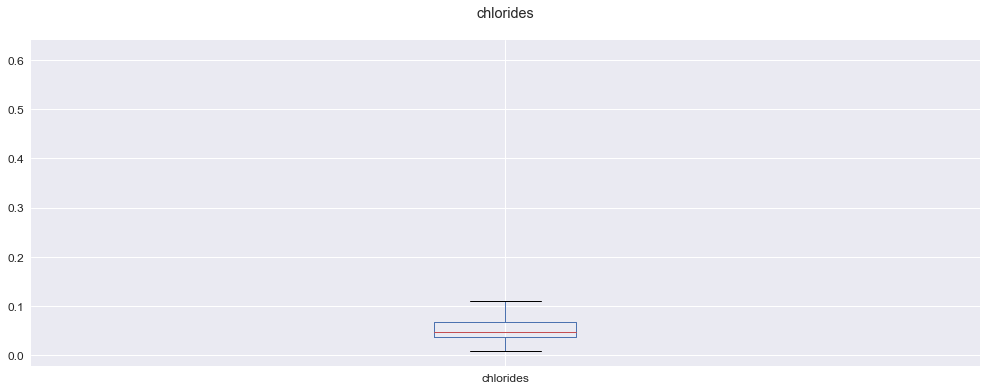

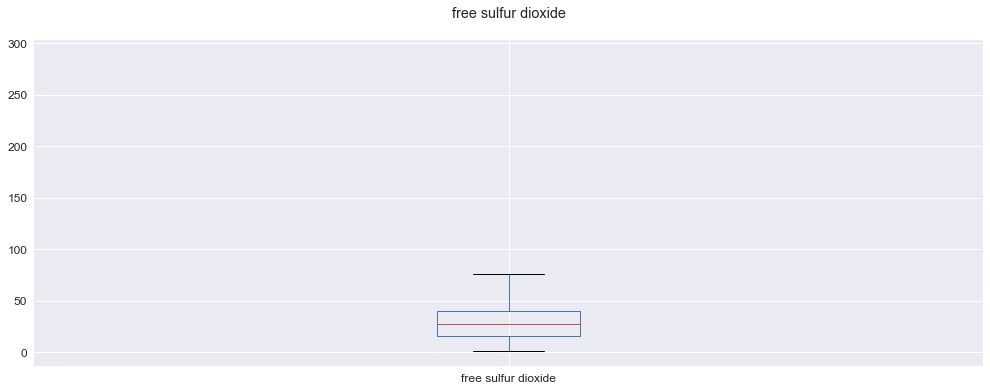

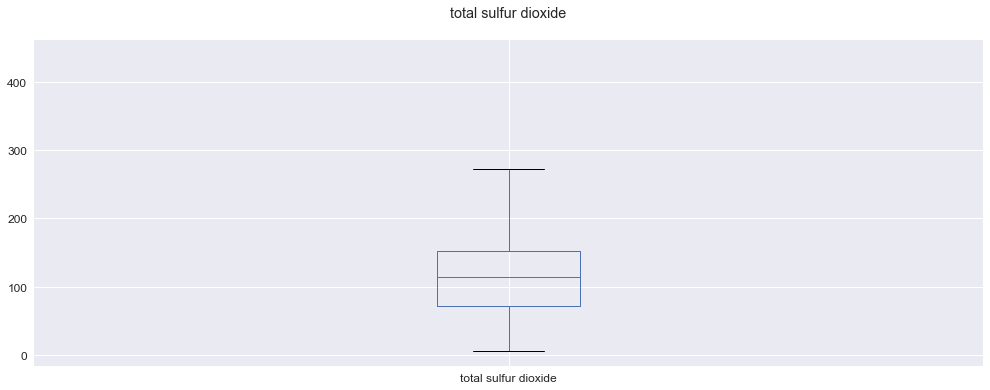

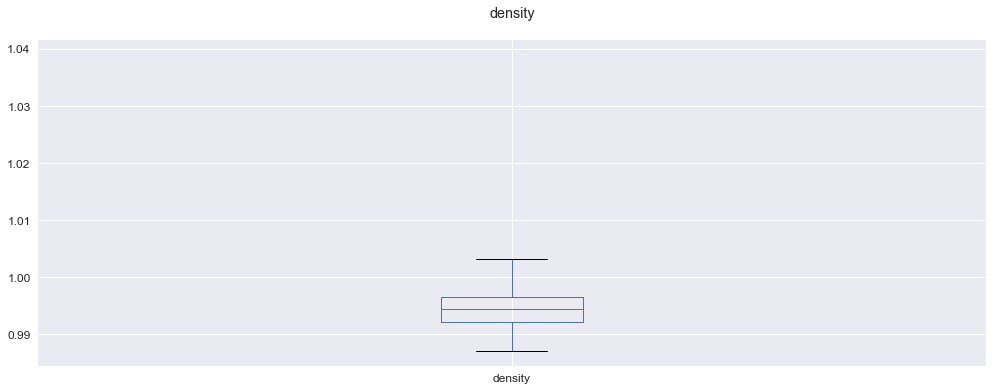

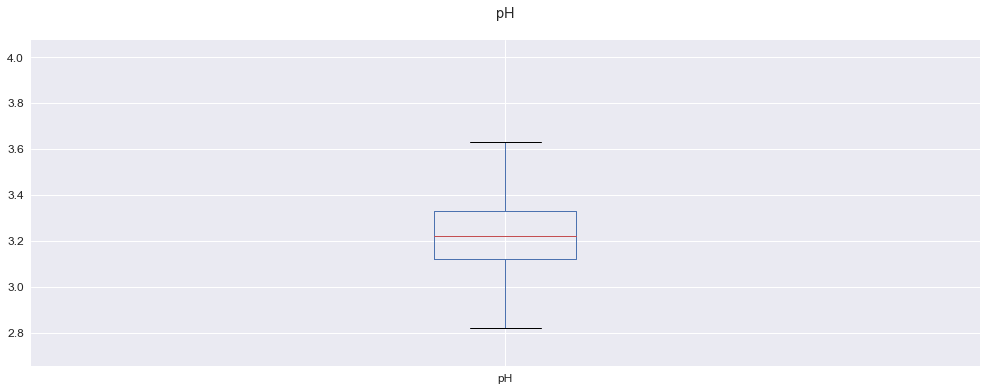

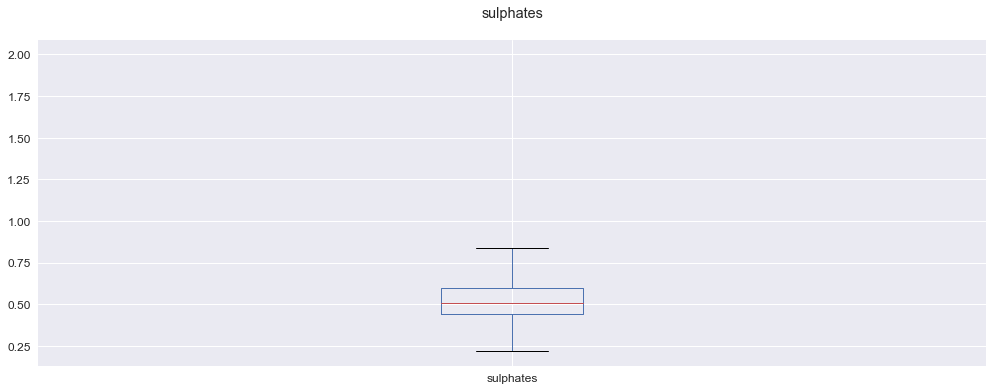

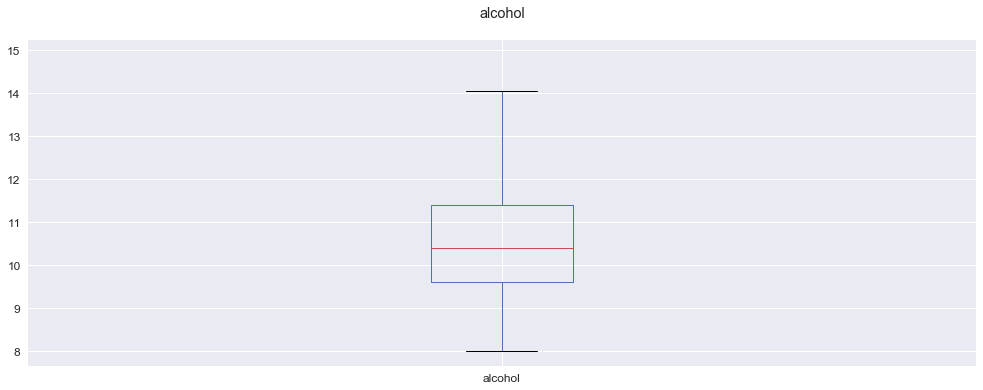

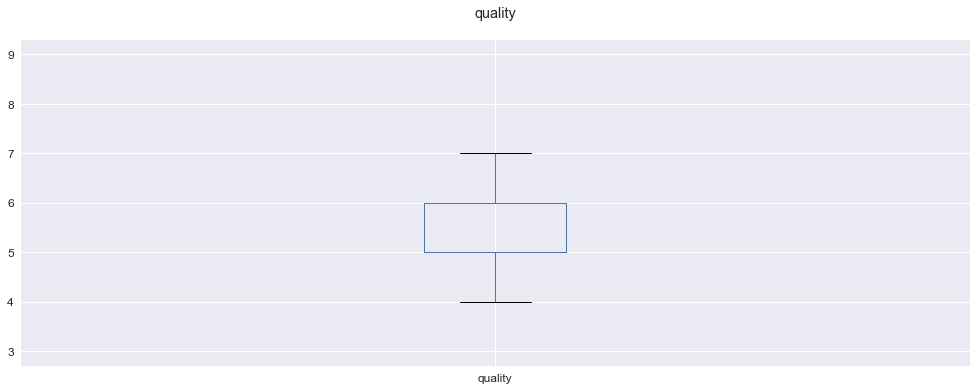

In [142]:
for C in df_Red_White.columns[:-1]:
    df_Red_White.boxplot(C, figsize =(17,6))
    plt.title("{}\n".format(C))
    plt.show()
 

Here we have two plots, the density plot and the box plot. This is a good way to view the data as we can see in the density plot (top) that there is some data points in the tails but it is difficult to see, however it is clear in the box plot

let's remove the outlier and replace with the median

In [143]:
def outliers(data):
    q1 =np.percentile(data,5)
    q3 = np.percentile(data,95)
    lower = q1 - 1.5*(q3-q1)
    upper = q1 + 1.5*(q3-q1)
    flag = (data <= lower) |(data>= upper)
    q2 = np.median(data)
    data [flag] = q2
    return (data)


                       

In [144]:
df_Red_White ['fixed acidity'] = outliers (df_Red_White ['fixed acidity'])
df_Red_White ['free sulfur dioxide'] = outliers (df_Red_White ['free sulfur dioxide'])
df_Red_White ['volatile acidity'] = outliers (df_Red_White ['volatile acidity'])
df_Red_White ['total sulfur dioxide'] = outliers (df_Red_White ['total sulfur dioxide'])
df_Red_White ['citric acid'] = outliers (df_Red_White ['citric acid'])
df_Red_White ['sulphates'] = outliers (df_Red_White ['sulphates'])
df_Red_White ['residual sugar'] = outliers (df_Red_White ['residual sugar'])
df_Red_White ['chlorides'] = outliers (df_Red_White ['chlorides'])
df_Red_White ['alcohol'] = outliers (df_Red_White ['alcohol'])
df_Red_White ['density'] = outliers (df_Red_White ['density'])

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [145]:
df_Red_White.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,White
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,White
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,White
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,White
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,White


The density represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol.

In other word,The density of water is close to that of water depending on the percent alcohol and sugar content.

I am checking the value for density.

In [146]:

np.sort(df_Red_White ['density'].unique())

array([ 0.98711 ,  0.98713 ,  0.98722 ,  0.9874  ,  0.98742 ,  0.98746 ,
        0.98758 ,  0.98774 ,  0.98779 ,  0.98802 ,  0.98815 ,  0.98816 ,
        0.98819 ,  0.98822 ,  0.98823 ,  0.988245,  0.98834 ,  0.98836 ,
        0.9884  ,  0.98845 ,  0.98853 ,  0.98854 ,  0.9886  ,  0.98862 ,
        0.98865 ,  0.98868 ,  0.98869 ,  0.9887  ,  0.98871 ,  0.98876 ,
        0.98878 ,  0.9888  ,  0.98882 ,  0.98883 ,  0.98884 ,  0.98886 ,
        0.98889 ,  0.9889  ,  0.98892 ,  0.98894 ,  0.98898 ,  0.989   ,
        0.98902 ,  0.98904 ,  0.9891  ,  0.98912 ,  0.98913 ,  0.98914 ,
        0.98915 ,  0.98916 ,  0.98918 ,  0.98919 ,  0.9892  ,  0.98922 ,
        0.98923 ,  0.98924 ,  0.98926 ,  0.98928 ,  0.9893  ,  0.989315,
        0.98934 ,  0.98935 ,  0.98936 ,  0.98938 ,  0.98939 ,  0.9894  ,
        0.98941 ,  0.98942 ,  0.989435,  0.98944 ,  0.98945 ,  0.98946 ,
        0.989465,  0.98947 ,  0.98948 ,  0.98949 ,  0.9895  ,  0.98951 ,
        0.98952 ,  0.98953 ,  0.98954 ,  0.98956 , 

In [147]:
# Calculate statistics of Density 
Wine_density = df_Red_White.density
Total_Number_density = df_Red_White.shape[0] # size of data

min_price = np.min(Wine_density) # minimum price
max_price = np.max(Wine_density) # maximum price
mean_price = np.mean(Wine_density) # mean price
median_price = np.median(Wine_density)# median price
std_price = np.std(Wine_density)# standard deviation
    
print ("Total Number:", Total_Number_density)
print ("Minimum Density: {:,.2f}".format(min_price))
print ("Maximum Density: {:,.2f}".format(max_price))
print ("Mean Density: {:,.2f}".format(mean_price))
print ("Median Density: {:,.2f}".format(median_price))
print ("Standard Deviation: {:,.2f}".format(std_price))


Total Number: 4328
Minimum Density: 0.99
Maximum Density: 1.00
Mean Density: 0.99
Median Density: 0.99
Standard Deviation: 0.00


Minimum Density: 0.99, Maximum Density: 1.04. I am going to apply binning on Density.

In [148]:
# creates 5 equally sized bins and assign each row of the data a bin label with labels 0-5
df_Red_White.loc[:, 'density_bin'] = pd.cut(df_Red_White.loc[:, 'density'], bins = 5, labels = range(5)) 
df_Red_White.loc[:, 'density_bin'].head(10)


1     3
2     3
3     3
5     3
6     2
7     2
8     3
10    2
12    2
13    3
Name: density_bin, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [149]:
#for each make, sum the total number of wine in each bin 
Density_Class = pd.crosstab(df_Red_White.loc[:, 'density_bin'], df_Red_White.loc[:, 'Class'])
Density_Class.head()

Class,Red,White
density_bin,,
0,368,1
1,1323,57
2,1041,542
3,412,488
4,45,51


Density number in Red Wine is greater than white Wine density except 3rd bin.Let's look the data in bar plot.

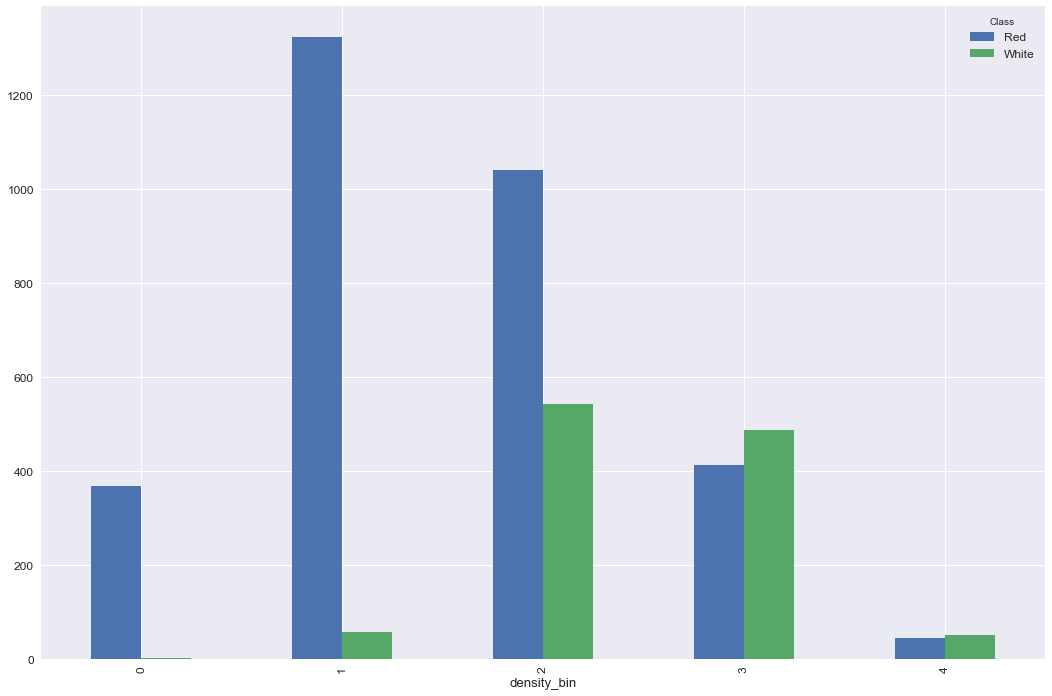

In [150]:
Density_Class.plot(kind = 'bar')

In [151]:
df_Red_White.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class,density_bin
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,White,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,White,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,White,3
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,White,3
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,White,2


In [152]:
df_Red_White["density"].unique()

array([ 0.9968  ,  0.997   ,  0.998   ,  0.9978  ,  0.9964  ,  0.9946  ,
        0.9959  ,  0.9943  ,  0.9974  ,  0.9986  ,  0.9969  ,  0.9982  ,
        0.9955  ,  0.9962  ,  0.9972  ,  0.9958  ,  0.9966  ,  0.9993  ,
        0.9957  ,  0.9975  ,  0.994   ,  0.9976  ,  0.9934  ,  0.9954  ,
        0.9971  ,  0.9956  ,  0.9983  ,  0.9967  ,  0.9961  ,  0.9984  ,
        0.9938  ,  0.9932  ,  0.9965  ,  0.9963  ,  0.996   ,  0.9973  ,
        0.9988  ,  0.9952  ,  0.9944  ,  0.9996  ,  0.9981  ,  0.9953  ,
        0.9924  ,  0.9948  ,  0.99695 ,  0.99545 ,  0.99615 ,  0.99625 ,
        0.99585 ,  0.99685 ,  0.99655 ,  0.99525 ,  0.99815 ,  0.99745 ,
        0.9927  ,  0.99675 ,  0.99925 ,  0.99565 ,  0.9985  ,  0.99965 ,
        0.99575 ,  0.9999  ,  1.00025 ,  0.99935 ,  0.99735 ,  0.99915 ,
        0.9997  ,  1.001   ,  0.9979  ,  0.9994  ,  1.0014  ,  1.0001  ,
        0.99855 ,  0.99845 ,  0.99645 ,  0.99975 ,  0.999   ,  1.0002  ,
        0.9992  ,  1.0008  ,  1.      ,  1.0006  , 

Does Wine with higher "free sulfur dioxide", "total sulfur dioxide" and "residual sugar" is Red Wine? or White wine? 

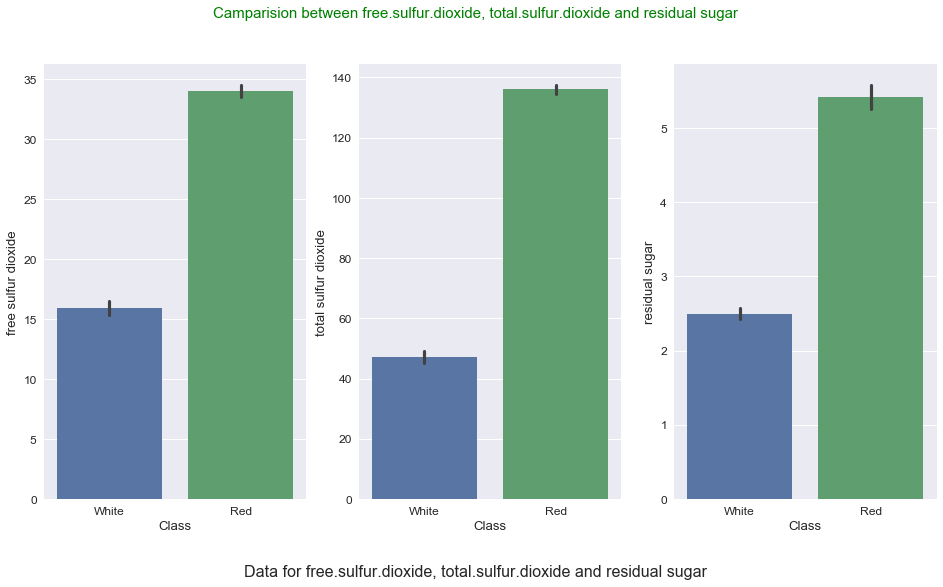

In [153]:
plt.rcParams["figure.figsize"] = (16,8)

y = df_Red_White.loc[:,'Class']
x1 =df_Red_White.loc[:,'free sulfur dioxide']
x2 =df_Red_White.loc[:,'total sulfur dioxide']
x3 =df_Red_White.loc[:,'residual sugar']

ax = plt.subplot(1,3,1);
sns.barplot(y,x1)

ax2 = plt.subplot(1,3,2)
sns.barplot(y, x2)

ax2 = plt.subplot(1,3,3)
sns.barplot( y, x3)

plt.suptitle('Camparision between free.sulfur.dioxide, total.sulfur.dioxide and residual sugar',fontsize=15, color='green')

plt.figtext(0.5, - 0.01, "Data for free.sulfur.dioxide, total.sulfur.dioxide and residual sugar", wrap=True,horizontalalignment='center', fontsize=16)
plt.show()

'free.sulfur.dioxide' and 'total.sulfur.dioxide' behave in a similar way, which makes sense because 'free.sulfur.dioxide' is a subset of 'total.sulfur.dioxide'.
We can clearly see the difference between white wine and red wine for Residual Sugar as well.

Total sulfur dioxide and level of residual sugar are positively correlated. Correlation shows higher value with Red wine.

Text(0.5,1,'fixed acidity vs. alcohol \n with Class by color')

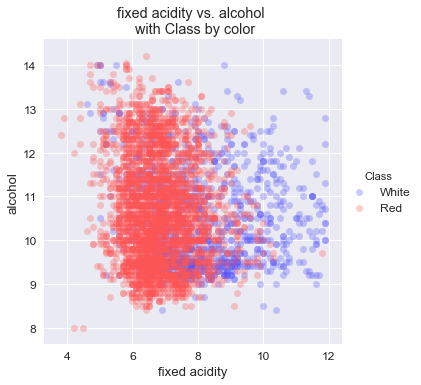

In [154]:
# better visibility
sns.lmplot(x='fixed acidity', y='alcohol', 
           data =df_Red_White,
           hue = "Class",
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           fit_reg = False)
plt.xlabel('fixed acidity')
plt.ylabel('alcohol')
plt.title('fixed acidity vs. alcohol \n with Class by color')

- In general, alcohol level of red wine is higher than alcohol level of white wine.


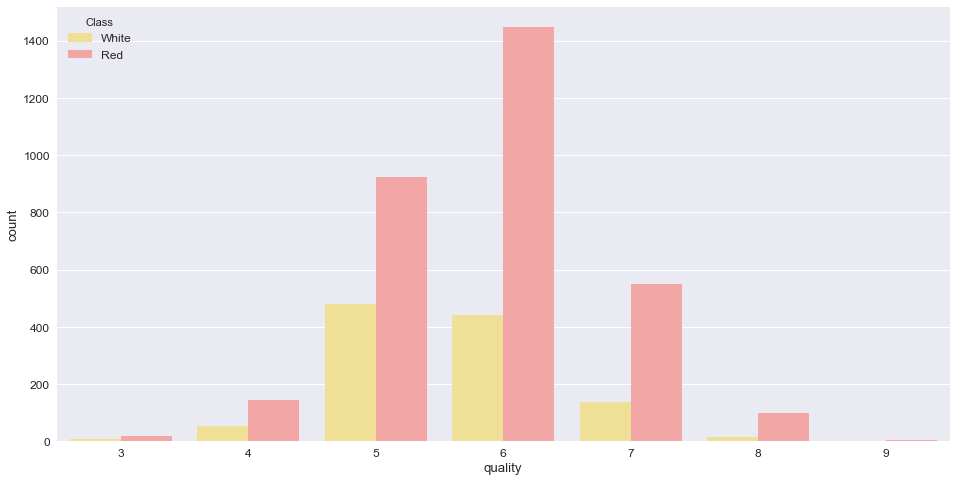

In [155]:
cp = sns.countplot(x="quality", hue="Class", data=df_Red_White, 
                   palette={"Red": "#FF9999", "White": "#FFE888"})

- Mostly frequent quality levels of red and white wine are 5 and 6.

Text(0.5,1,'volatile acidity vs. sulphates on class')

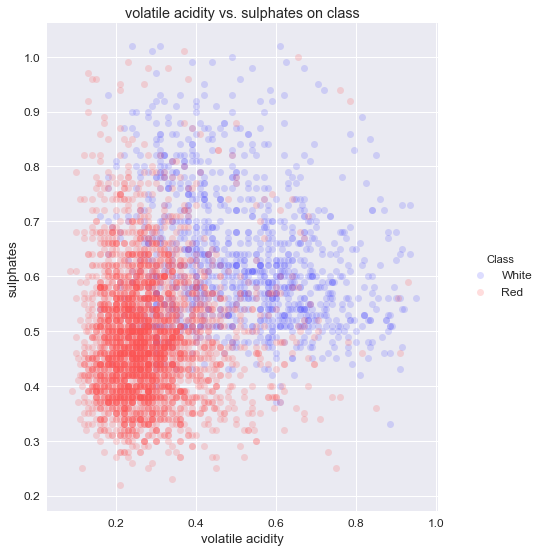

In [156]:
plt.rcParams['figure.figsize']=(8,8)

g = sns.lmplot(x = 'volatile acidity', y = 'sulphates', 
           data =df_Red_White, 
           hue = "Class", 
           palette="seismic", 
           scatter_kws={'alpha':0.2},
           fit_reg = False
          )
g.fig.set_size_inches(8,8)
plt.xlabel('volatile acidity')
plt.ylabel('sulphates')
plt.title('volatile acidity vs. sulphates on class')

scatter plot clearly shows white wine has high volatile acidity level and sulphates level than Red wine.

Text(0,0.5,'Chlorides')

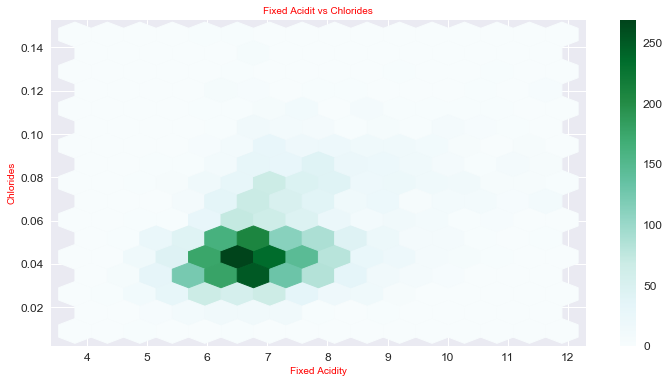

In [157]:
ax =plt.figure(figsize =(12,6)).gca()
df_Red_White.plot.hexbin(x='fixed acidity',y='chlorides',gridsize =15,ax=ax)
ax.set_title('Fixed Acidit vs Chlorides', fontsize =10, color = 'r') # Give the plot a main title
ax.set_xlabel('Fixed Acidity',fontsize =10, color = 'r')# Set text for y axis
ax.set_ylabel('Chlorides', fontsize =10, color = 'r')

We can clearly see the high density in the middle portion.

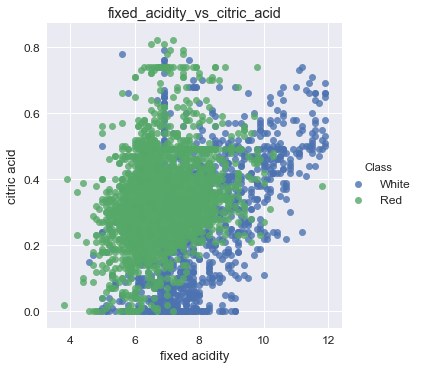

In [158]:
# creates the plot using
fixed_acidity_vs_citric_acid = sns.lmplot(x = 'fixed acidity', y = 'citric acid', data = df_Red_White, hue = 'Class', fit_reg=False)

# set title
fixed_acidity_vs_citric_acid.set(title = 'fixed_acidity_vs_citric_acid')

Graph shows that citric acid and fixed acidity is low for the Red Wine and high for the white wine.

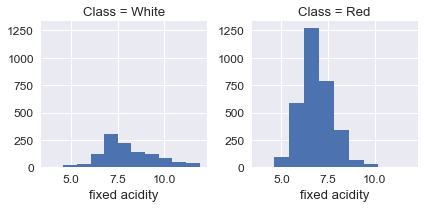

In [159]:

gr = sns.FacetGrid(df_Red_White, col = "Class")
gr = gr.map(plt.hist, 'fixed acidity')

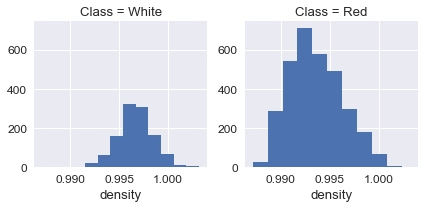

In [160]:
gr = sns.FacetGrid(df_Red_White, col = "Class")
gr = gr.map(plt.hist, 'density')

When fixed acidity increases density of red wine increases as well. White wine almost doesn’t show any correlation.

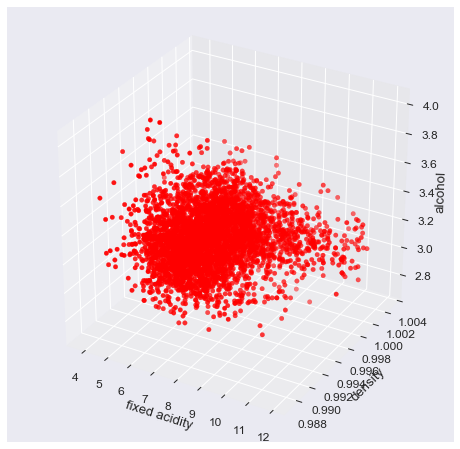

In [161]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =(df_Red_White ['fixed acidity'])
y =(df_Red_White ['density'])
z =(df_Red_White ['pH'])

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('fixed acidity')
ax.set_ylabel('density')
ax.set_zlabel('alcohol')

plt.show()

- When alcohol percentage decreases, density grows.


When fixed acidity increases density of red wine increases as well. White wine almost doesn’t show any correlation.

Text(0.5,1,'residual sugar vs. Alcohol \n with Wine type by color \n with engine size as marker size')

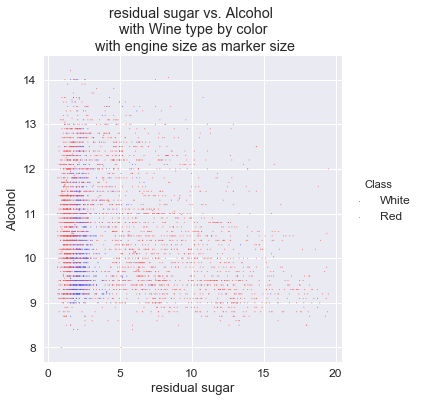

In [162]:

sns.lmplot(x = 'residual sugar', y = 'alcohol', 
           data = df_Red_White, 
           hue = "Class", 
           palette="seismic", 
           scatter_kws={'alpha':0.9, 
                        's': df_Red_White.loc[:, 'density']},
           fit_reg = False)
plt.xlabel('residual sugar')
plt.ylabel('Alcohol')
plt.title('residual sugar vs. Alcohol \n with Wine type by color \n with engine size as marker size')

Alcohol level of white wine decreases with the growth of residual sugar level.

#### Analyzing the data we can come up the following conclusion:
- When alcohol percentage decreases, density grows.
- In general alcohol level of red wine is higher than alcohol level of white wine.
- When fixed acidity increases density of red wine increases as well. White wine almost doesn’t show any correlation.
- Total sulfur dioxide and level of residual sugar are positively correlated. Correlation shows higher value with white wine.
- White wine density and residual sugar level have positive correlation.
- Alcohol level of white wine decreases with the growth of residual sugar level

### T-test

I am going to use t-test to check if there is difference in mean for Red wine residual sugar and White Wine residual sugar

The null hypothesis is a statement that says that there is no difference between two measures.

#### H0 =There is no  significant difference of means  between Red Wine residual sugar and White Wine residual sugar

#### Ha= The difference of means is significant between Red Wine residual sugar and White Wine residual sugar

Wines with higher "residual Sugar" is Red wine or White Wine? 

Text(0,0.5,'residual sugar')

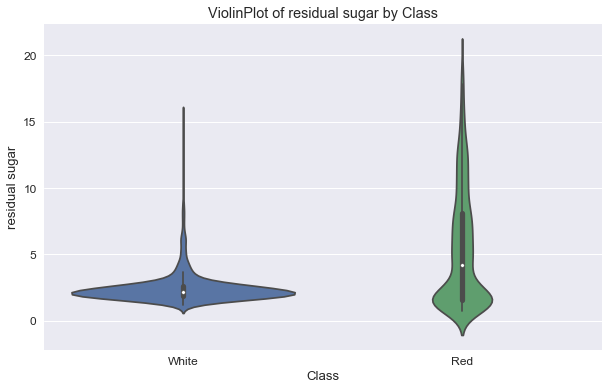

In [163]:
fig= plt.figure(figsize=(10,6))
ax=fig.gca()
sns.set_style("whitegrid")
sns.violinplot(x ='Class',y ='residual sugar', data=df_Red_White , ax=ax)
ax.set_title('ViolinPlot of residual sugar by Class') # Give the plot a main title
ax.set_xlabel('Class') # Set text for the x axis
ax.set_ylabel('residual sugar')# Set text for y axis

The residual sugar for both Wines overlap quite a lot. The outliers of residual sugar for all are clearly visible. The median (white dot) for white wine is low compared to the red wine. Inner quartiles range and wiskers at +/-2.5 of the IQR for all conditions have overlapped in small portion.

In [164]:
Red_Residual_Sugar =df_Red_White.loc[df_Red_White.loc[:,'Class'] == "Red", 'residual sugar']
White_Residual_Sugar = df_Red_White.loc[df_Red_White.loc[:,'Class'] == "White",'residual sugar']


len(Red_Residual_Sugar), len(White_Residual_Sugar)


(3189, 1139)

In [165]:
def count_mean(data):
    import numpy as np
    import pandas as pd
    groups = data.groupby('Class') # Create the groups
    ## Create a data frame with the counts and the means of the groups
    return pd.DataFrame({'count': groups.size(), 
                        'mean': groups.aggregate(np.mean).loc[:, 'residual sugar']})
   
count_mean(df_Red_White)

,count,mean
Class,,
Red,3189,5.423644
White,1139,2.493635


In [166]:
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   

In [167]:
Wine_R_Sugar = t_test(Red_Residual_Sugar , White_Residual_Sugar , alpha = 0.05)
print(Wine_R_Sugar)

DegFreedom     4.188018e+03
Difference     2.930009e+00
Statistic      2.194075e+01
PValue        2.928429e-101
Low95CI        2.759322e+00
High95CI       3.100696e+00
dtype: float64


A p-value is the probability of rejecting a null-hypothesis when the hypothesis is proven true. 
we also know, If the p-value is equal to or less than the significance level (α), then the null hypothesis is inconsistent and it needs to be rejected.

As we know if the p-value is less than 0.05, we reject the null hypothesis that there's no difference between the means and conclude that these is a  significant difference between Red Wine residual sugar and White Wine residual sugar.



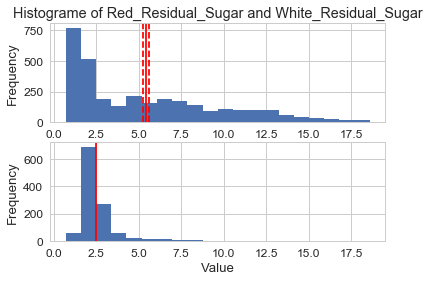

In [168]:
%matplotlib inline
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

def plot_t(a, b, t_test, cols=['Red_Residual_Sugar' , 'White_Residual_Sugar'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
plot_t(Red_Residual_Sugar , White_Residual_Sugar, Wine_R_Sugar )
    
    
    

#### Examine these statistics noticing the following:
- Difference in means is very large.
- t-statistic is small and the p-value is large too.
- Based at the above statistics we can reject the null hypothesis. 
- Notice that the mean of the population in the lower plot is not within the confidence interval of the difference of means of the population. This confirms that we can reject the null hypothesis that there is no significant difference in these means. 
- Notice that the mean of the population in the lower plot is at 2.5 and upper plot is at 6. This confirms that we cannot accept the null hypothesis that there is no significant difference in these means. 
- we have to consider residual Sugar as an important feature for next calculations.

#### Bootstrap Method

Wines with higher "fixed acidity" is Red wine or White Wine? 

let's use Bootstrap Method on fixed acidity feature.We will bootstrap the means of the fixed acidity of different populations from Wine data

Text(0,0.5,'Fixed acidity')

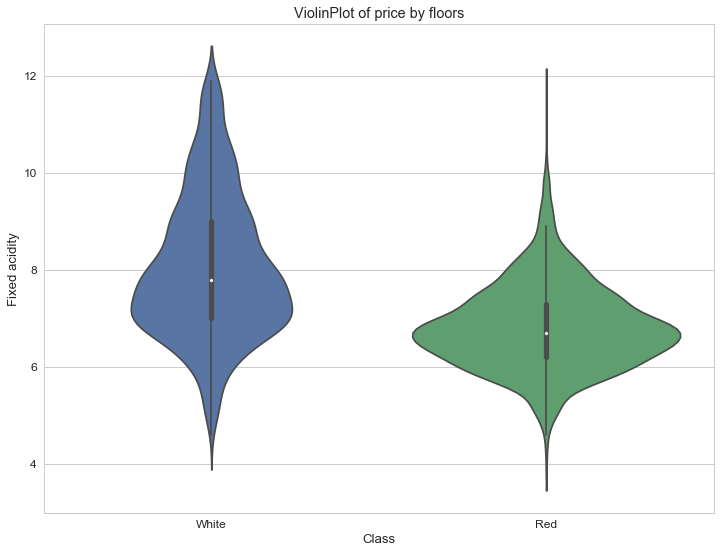

In [169]:
fig= plt.figure(figsize=(12,9))
ax=fig.gca()
sns.set_style("whitegrid")
sns.violinplot(x ='Class',y ='fixed acidity', data = df_Red_White, ax=ax)
ax.set_title('ViolinPlot of price by floors') # Give the plot a main title
ax.set_xlabel('Class') # Set text for the x axis
ax.set_ylabel('Fixed acidity')# Set text for y axis

In [170]:
White = df_Red_White[df_Red_White['Class'] == 'White']
Red = df_Red_White[df_Red_White['Class'] == 'Red']

Red_fixed_acidity =df_Red_White.loc[df_Red_White.loc[:,'Class'] == "Red", 'fixed acidity']
White_fixed_acidity = df_Red_White.loc[df_Red_White.loc[:,'Class'] == "White",'fixed acidity']



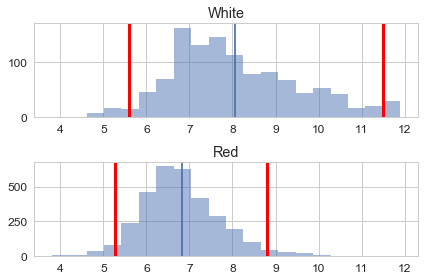

In [171]:
import pandas
import matplotlib.pyplot as plt
def plot_hist(x, bins, p=5):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5, bins=bins)
    plt.axvline(x.mean())
    # central 100*(1-p)% of data   
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)
    
def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B', p=5):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    combined = pd.concat([a, b])
    #create a series of bins
    breaks = np.linspace( 
        combined.min(), 
        combined.max(), 
        num=nbins+1)

    plt.subplot(2, 1, 1)
    plot_hist(a, bins=breaks)
    plt.title(a_label)
    
    plt.subplot(2, 1, 2)
    plot_hist(b, bins=breaks)
    plt.title(b_label)
        
    plt.tight_layout() # cleaner plot layout
    

plot_dists(White_fixed_acidity, Red_fixed_acidity, 20, a_label='White', b_label='Red')

From above data I am going to select the below features 
 - 'fixed acidity',
 - 'volatile acidity',
 - 'citric acid',
 - 'residual sugar',
 - 'chlorides',
 - 'free sulfur dioxide',
 - 'total sulfur dioxide',
 - 'density',
 - 'pH',
 - 'sulphates',

 


- What is the percentage of correct classification results (using a subset of the attributes)?
- What is the AUC of your model?
- What is the best AUC that you can achieve?
- Which are the the minimum number of attributes? Why?

This is a classification problem where we have 2 categories, 0 and 1

In order to **build a model**

- Features must be **numeric**


    Machine Learning models conduct mathematical operations so this is necessary
    
    
- Every observation must have the **same features in the same order**


    Rows must have features with the same order for meaningful comparison

### Step 3: Selection of Model

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

Again, scikit learn (python library) will help here to build a Naive Bayes model in Python. There are three types of Naive Bayes model under scikit learn library:

- Gaussian: It is used in classification and it assumes that features follow a normal distribution.


- Multinomial: It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.


- Bernoulli: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

Based on our data set, we can choose **Gaussian model** for further prediactions.

### Step 4: Split data into training and test sets.

Splitting the data into training and test sets at the beginning of your modeling workflow is crucial for getting a realistic estimate of your model's performance.

First, let's separate our target (y) features from our input (X) features:

In [172]:
from collections import Counter
from sklearn.metrics import *
import seaborn as sns; sns.set(font_scale=1.2)

In [173]:
df_Red_White['Class'] = df_Red_White.Class.apply(lambda x: 0 if x == "Red" else 1)

In [174]:
df_Red_White.Class.value_counts()

0    3189
1    1139
Name: Class, dtype: int64

In [175]:
X = df_Red_White.iloc[:, 0:12]   # load features into X DF
Y = df_Red_White.iloc[:, 13]     # Load target into Y DF

In [176]:
features = df_Red_White.as_matrix(columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',

                                             'total sulfur dioxide','density','pH','sulphates'])
target =df_Red_White['Class']

### Step 5: Tune model using a cross-validation pipeline.

Cross- Validation is one of the most important skills in all of machine learning because it helps you maximize model performance while reducing the chance of overfitting.

Cross-validation is a process for reliably estimating the performance of a method for building a model by training and evaluating your model multiple times using the same method.

Practically, that "method" is simply a set of hyperparameters in this context.

These are the steps for CV:
- Split your data into k equal parts, or "folds" (typically k=10).
- Train your model on k-1 folds (e.g. the first 9 folds).
- Evaluate it on the remaining "hold-out" fold (e.g. the 10th fold).
- Perform steps (2) and (3) k times, each time holding out a different fold.
- Aggregate the performance across all k folds. This is your performance metric.

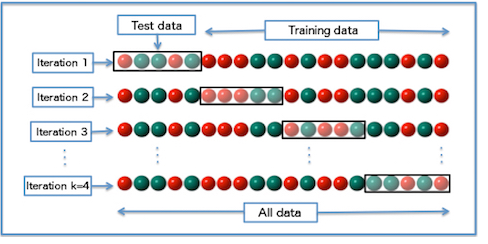

In [177]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, random_state=7)  # 10 fold cross validation ; 
                                            # 7 random state is to assure consistent results

Naive Bayes assumes that each data point is independent.

The formula looks like this: . This is saying "the probability that classification y is correct given the features , , and so on equals the probability of y times the product of each x feature given y, divided by the probability of the x features"

In [178]:
from sklearn.naive_bayes import GaussianNB

nbc_results = cross_val_score(GaussianNB(), X, Y, cv=kfold)
print("Accuracy: %.3f%% (std:%.3f)" % (nbc_results.mean()*100, nbc_results.std()))

Accuracy: 78.007% (std:0.059)



##### What is the percentage of correct classification results (using all attributes):

Here the accuracy is 78%. 

### Step 5: Declare data preprocessing steps.



let's take a subset of below features which we have selected in **Feature selection section**

Removed correlated features, as the highly correlated features are voted twice in the model and it can lead to over inflating importance.


- 'fixed acidity',
- 'volatile acidity',
 -'citric acid',
- 'residual sugar',
- 'chlorides',
- 'free sulfur dioxide',
- 'total sulfur dioxide',
- 'density',
- 'pH',
- 'sulphates',

In [179]:
X = df_Red_White.loc[:, ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
                     'total sulfur dioxide','density','pH','sulphates']]  # load features into X DF
Y = df_Red_White.iloc[:, 13]     # Load target into Y DF

In [180]:
from sklearn.naive_bayes import GaussianNB

nbc_results = cross_val_score(GaussianNB(), X, Y, cv=kfold)
print("Accuracy: %.3f%% (std:%.3f)" % (nbc_results.mean()*100, nbc_results.std()))

Accuracy: 72.646% (std:0.039)


Using a subset of the attributes, accuracy has dropped by 6%. This is happenng because features are not normal distributed. Gaussian model assumes that features follow a normal distribution.If continuous features do not have normal distribution, we should use transformation or standardization methods to convert it in normal distribution.

#### Here are some tips for improving power of Naive Bayes Model that we can consider : 


- If continuous features do not have normal distribution, we should use transformation or different methods to convert it in normal distribution.


- If test data set has zero frequency issue, apply smoothing techniques “Laplace Correction” to predict the class of test data set.


- Remove correlated features, as the highly correlated features are voted twice in the model and it can lead to over inflating importance.


- Naive Bayes classifiers has limited options for parameter tuning like alpha=1 for smoothing, fit_prior=[True|False] to learn class prior probabilities or not and some other options (look at detail here). I would recommend to focus on your  pre-processing of data and the feature selection.


### Step 6: Standardization of Data

Standardization is the process of subtracting the means from each feature and then dividing by the feature standard deviations.

Standardization is a common requirement for machine learning tasks. Many algorithms assume that all features are centered around zero and have approximately the same variance.

In [181]:
# Scale function
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [237]:
# Scale all columns first

df_Red_White['fixed acidity'] = scale(df_Red_White['fixed acidity'])
df_Red_White['volatile acidity'] = scale(df_Red_White['volatile acidity'])
df_Red_White['citric acid'] = scale(df_Red_White['citric acid'])
df_Red_White['residual sugar'] = scale(df_Red_White['residual sugar'])
df_Red_White['chlorides'] = scale(df_Red_White['chlorides'])
df_Red_White['free sulfur dioxide'] = scale(df_Red_White['free sulfur dioxide'])
df_Red_White['total sulfur dioxide'] = scale(df_Red_White['total sulfur dioxide'])
df_Red_White['density'] = scale(df_Red_White['density'])
df_Red_White['pH'] = scale(df_Red_White['pH'])
df_Red_White['sulphates'] = scale(df_Red_White['sulphates'])




In [238]:
X_Scaled = df_Red_White.as_matrix(columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
                     'total sulfur dioxide','density','pH','sulphates'])
y_Scaled =df_Red_White['Class']

By using Gaussian NB method

In [239]:
from sklearn.naive_bayes import GaussianNB

# 2. instantiate a GaussianNB  model
GNB = GaussianNB()

nbg_results = cross_val_score(GaussianNB(),X_Scaled , y_Scaled, cv=kfold)
print("Accuracy: %.3f%% (std:%.3f)" % (nbc_results.mean()*100, nbc_results.std()))

Accuracy: 72.646% (std:0.039)


Advantage of Naive bayes classifiers: 
- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

let's use train test split method  

In [185]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, roc_curve,auc

In [186]:
X_Scaled = df_Red_White.as_matrix(columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
                     'total sulfur dioxide','density','pH','sulphates'])
y_Scaled =df_Red_White['Class']


In [187]:
print(X_Scaled.shape)
print(y_Scaled.shape)

(4328, 10)
(4328,)


In [188]:
#Setting random seed
seed =1

In [222]:
#Splitting binary dataset into test and train 
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,y_Scaled,test_size=0.3,random_state=seed)

In [223]:
# Instantiate: create object
gnb = GaussianNB()

# Fit
gnb.fit(X_train, y_train)

# Predict
y_pred = gnb.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print( acc)

0.979984603541


#### What is the percentage of correct classification results (using a subset of the attributes)? -- 97%

In [191]:
# using X_train (timing it with an IPython "magic command")

%time gnb.fit(X_train, y_train)

Wall time: 4 ms


GaussianNB(priors=None)

#### Which are the the minimum number of attributes? Why?

These 10 attributes are important as these are providing accuracy 98%.
'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
                     'total sulfur dioxide','density','pH','sulphates

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

### Step 7: Evaluate model pipeline on test data.

In [192]:
from sklearn.metrics import roc_curve, roc_auc_score

In [193]:
print(confusion_matrix(y_test, y_pred))

CM_log = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = CM_log.ravel()
print(TN, FP, FN, TP )

[[931  19]
 [  7 342]]
931 19 7 342


In [194]:
#Classification Accuracy: Overall, how often is the classifier correct?
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred))

0.979984603541
0.979984603541


In [195]:
#Classification Error: Overall, how often is the classifier incorrect?

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - accuracy_score(y_test, y_pred))

0.0200153964588
0.0200153964588


In [196]:
#Sensitivity: When the actual value is positive, how often is the prediction correct?
#How "sensitive" is the classifier to detecting positive instances?
print(TP / float(TP + FN))
print(recall_score(y_test, y_pred))

0.97994269341
0.97994269341


In [197]:
#Precision: When a positive value is predicted, how often is the prediction correct?
print(TP / float(TP + FP))
print(precision_score(y_test, y_pred))

0.947368421053
0.947368421053


ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

In [198]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
# Store the predicted probabilities for class 1
y_nbc_pred_prob = gnb.predict_proba(X_test)[:, 1]
y_nbc_pred_prob




array([  5.21043540e-04,   7.27428728e-06,   1.30478615e-03, ...,
         8.88030336e-07,   9.99998353e-01,   9.99999997e-01])

In [199]:
#calculate AUC
roc_auc_score(y_test, y_nbc_pred_prob)

0.99385914643341888

In [200]:
#f1_score
print(f1_score(y_test, y_pred))

0.96338028169



TP rates: [ 0.    0.51  0.51  0.52  0.52  0.58  0.58  0.68  0.68  0.8   0.8   0.83
  0.83  0.88  0.88  0.9   0.9   0.93  0.93  0.95  0.95  0.96  0.96  0.97
  0.97  0.98  0.98  0.98  0.98  0.98  0.98  0.99  0.99  0.99  0.99  0.99
  0.99  0.99  0.99  1.    1.    1.    1.  ]

FP rates: [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.02  0.02  0.03  0.03  0.03  0.03  0.05  0.05  0.05  0.05
  0.11  0.11  0.18  0.18  0.87  0.87  1.  ]

Probability thresholds: [ 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  0.99  0.99  0.99  0.98  0.96  0.96  0.93  0.93  0.92  0.91  0.84  0.83
  0.79  0.73  0.73  0.11  0.09  0.07  0.07  0.02  0.02  0.02  0.02  0.    0.
  0.    0.    0.    0.    0.  ]


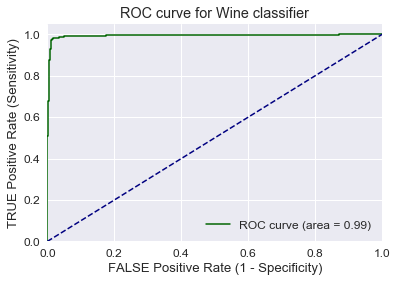


AUC score (using auc function): 0.99

AUC score (using roc_auc_score function): 0.99 



In [201]:
# ROC analysis
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC = 'darkgreen' # Line Color

fpr, tpr, th = roc_curve(y_test, y_nbc_pred_prob) # False Positive Rate, True Posisive Rate, probability thresholds
AUC = auc(fpr, tpr)
print ("\nTP rates:", np.round(tpr, 2))
print ("\nFP rates:", np.round(fpr, 2))
print ("\nProbability thresholds:", np.round(th, 2))
#####################

plt.figure()
plt.title('ROC curve for Wine classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE Positive Rate (1 - Specificity)')
plt.ylabel('TRUE Positive Rate (Sensitivity)')
plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
plt.legend(loc=LL)
plt.show()

####################

print ("\nAUC score (using auc function):", np.round(AUC, 2))
print ("\nAUC score (using roc_auc_score function):", np.round(roc_auc_score(y_test, y_nbc_pred_prob), 2), "\n")

What is the AUC of your model? 
What is the best AUC that you can achieve?


Answer --  99%



Bernoullian Naive Bayes case-


let's use Bernoullian model to compare with above model. 

In real applications like this one, we only have access to a finite set of examples, usually smaller than we wanted, and we need to test our model on samples not seen during the training process. A model that would just classify the samples that it has seen would have a very good score, but would definitely fail to predict unseen data. This situation is called overfitting and to avoid it we need to apply an appropriate validation procedure to select the parameters. A tool that can help us solve this problem is the Cross-Validation (CV). The idea behind CV is simple: the data are split into train and test sets several consecutive times and the averaged value of the prediction scores obtained with the different sets is the evaluation of the classifier. 

In [202]:
#Parameters selection with Cross-Validation 
from sklearn.naive_bayes import BernoulliNB
# test the model for alpha = 0.1, 0.2, ..., 1.0
parameters = [{'alpha':np.linspace(0.1,1,10)}]

from sklearn.grid_search import GridSearchCV
clf = GridSearchCV(BernoulliNB(), parameters, cv=10, scoring='f1')
clf.fit(X_train, y_train) # running the grid search



GridSearchCV(cv=10, error_score='raise',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])}],
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

Now, we imported the classifier we want to use (a Bernoullian Naive Bayes in this case), specified a set of values for the parameter we wanted to choose and run a grid search.



The grid search has evaluated the classifier for each value specified for the parameter alpha using the CV. We can visualize the results as follows.

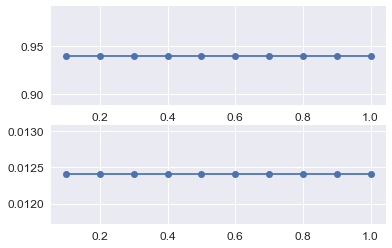

In [203]:
res = list(zip(*[(f1m, f1s.std(), p['alpha']) 
            for p, f1m, f1s in clf.grid_scores_]))
plt.subplot(2,1,1)
plt.plot(res[2],res[0],'-o')
plt.subplot(2,1,2)
plt.plot(res[2],res[1],'-o')
plt.show()

The plots above show the average score (top) and the standard deviation of the score (bottom) for each values of alpha used. 


We can also see thet using the alpha value that gave us the best results on the the test set we selected at the beginning gives us results that are similar to the ones obtained during the CV stage

In [204]:
from sklearn.metrics import f1_score
print ('Best alpha in CV = %0.01f' % clf.best_params_['alpha'])
final = f1_score(y_test,clf.best_estimator_.predict(X_test))
print ('F1-score on the final testset: %0.5f' % final)

Best alpha in CV = 0.1
F1-score on the final testset: 0.94388


### Step 8: Declare hyperparameters to tune

There are two types of parameters we need to worry about: model parameters and hyperparameters. Models parameters can be learned directly from the data (i.e. regression coefficients), while hyperparameters cannot.

Hyperparameters express "higher-level" structural information about the model, and they are typically set before training the model.


Naive Bayes classifiers has limited options for parameter tuning like alpha=1 for smoothing, fit_prior=[True|False] to learn class prior probabilities or not and some other options (look at detail here). I would recommend to focus on your pre-processing of data and the feature selection

Using PCA:

In Principle Component Analysis (PCA) we are interested in the components that maximize the variance.

In [205]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
RANDOM_STATE = 42
FIG_SIZE = (10, 7)


X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)
# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)


# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the normal test dataset with PCA
89.99%


Prediction accuracy for the standardized test dataset with PCA
98.23%



In [206]:
# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Show first principal componenets
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])



PC 1 without scaling:
 [ -6.07884231e-03  -1.03311186e-03   4.53800064e-04   3.47267669e-02
  -1.35142440e-04   2.11996325e-01   9.76633319e-01  -3.12050622e-07
  -5.80643116e-04  -6.23271361e-04]

PC 1 with scaling:
 [ 0.27205035  0.38733233 -0.13833659 -0.24762271  0.40963094 -0.39966257
 -0.43708377  0.21417923  0.18608205  0.31054642]


In [207]:
# Scale and use PCA on X_train data for visualization.
scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

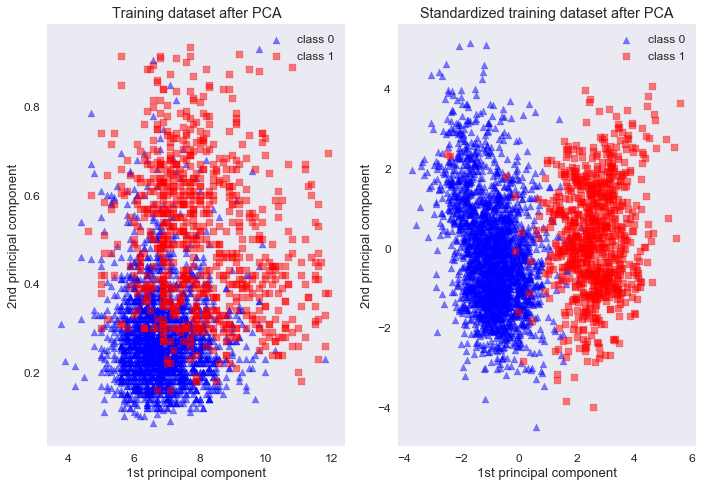

In [208]:
# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 3), ('blue', 'red'), ('^', 's')):
    ax1.scatter(X_train[y_train == l, 0], X_train[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red'), ('^', 's', )):
    ax2.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

In [209]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [210]:
def test_BernoulliNB_alpha(*data):
    '''
    test the performance with different alpha
    :param data: train_data, test_data, train_value, test_value
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    alphas=np.logspace(-2,5,num=200)
    train_scores=[]
    test_scores=[]
    for alpha in alphas:
        cls=BernoulliNB(alpha=alpha)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))
                
  ## graph
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas,train_scores,label="Training Score")
    ax.plot(alphas,test_scores,label="Testing Score")
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.0)
    ax.set_title("BernoulliNB")
    ax.set_xscale("log")
    ax.legend(loc="best")
    plt.show()

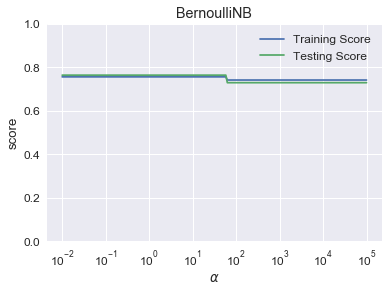

In [211]:
test_BernoulliNB_alpha(X_train,X_test,y_train,y_test)

Additive (Laplace/Lidstone) smoothing parameter - Alpha - 1

In [212]:
def test_BernoulliNB_binarize(*data):
    '''
    test the performance with different binarize
    :param data: train_data, test_data, train_value, test_value
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    min_x=min(np.min(X_train.ravel()),np.min(X_test.ravel()))-0.1
    max_x=max(np.max(X_train.ravel()),np.max(X_test.ravel()))+0.1
    binarizes=np.linspace(min_x,max_x,endpoint=True,num=100)
    train_scores=[]
    test_scores=[]
    for binarize in binarizes:
        cls=BernoulliNB(binarize=binarize)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))

    ## graph
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(binarizes,train_scores,label="Training Score")
    ax.plot(binarizes,test_scores,label="Testing Score")
    ax.set_xlabel("binarize")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.0)
    ax.set_xlim(min_x-1,max_x+1)
    ax.set_title("BernoulliNB")
    ax.legend(loc="best")
    plt.show() 

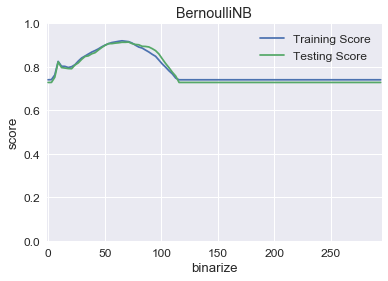

In [213]:
test_BernoulliNB_binarize(X_train,X_test,y_train,y_test)

binarize : float or None, optional (default=0.0)
Threshold for binarizing (mapping to booleans) of sample features. 

If None, input is presumed to already consist of binary vectors. -- Let's pick 0 , we can pick any number after 120

In [230]:
#Splitting binary dataset into test and train 
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,y_Scaled,test_size=0.3,random_state=seed)

In [231]:
 from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train,y_train)
BernoulliNB(alpha=1.0, binarize=0, class_prior=None, fit_prior=True)


BernoulliNB(alpha=1.0, binarize=0, class_prior=None, fit_prior=True)

In [232]:
 y_pred = clf.predict(X_test)

In [233]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print( acc)

0.969976905312



### Step 9: Save model for future use.


Finally completed!! 

Done with the hard part, and deserve another glass of wine. Maybe this time I can use this shiny new predictive model to select the bottle.

In [217]:
from sklearn.externals import joblib 
joblib.dump(clf, 'rf_regressor.pkl')

['rf_regressor.pkl']

In [218]:
#When you want to load the model again, simply use this function. Load model from PLK function
#clf2 = joblib.load('rf_regressor.pkl')
 
#Predict data set using loaded model
#clf2.predict(X_test)
 


we looked at one of the supervised machine learning algorithm **“Naive Bayes”** mainly used for classification. 